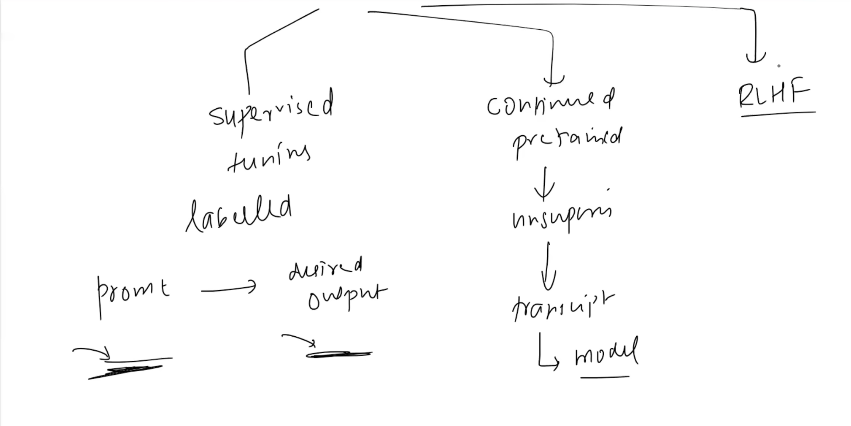

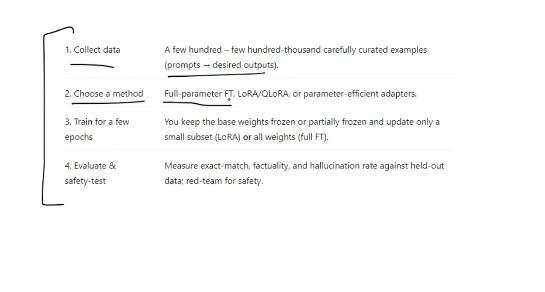

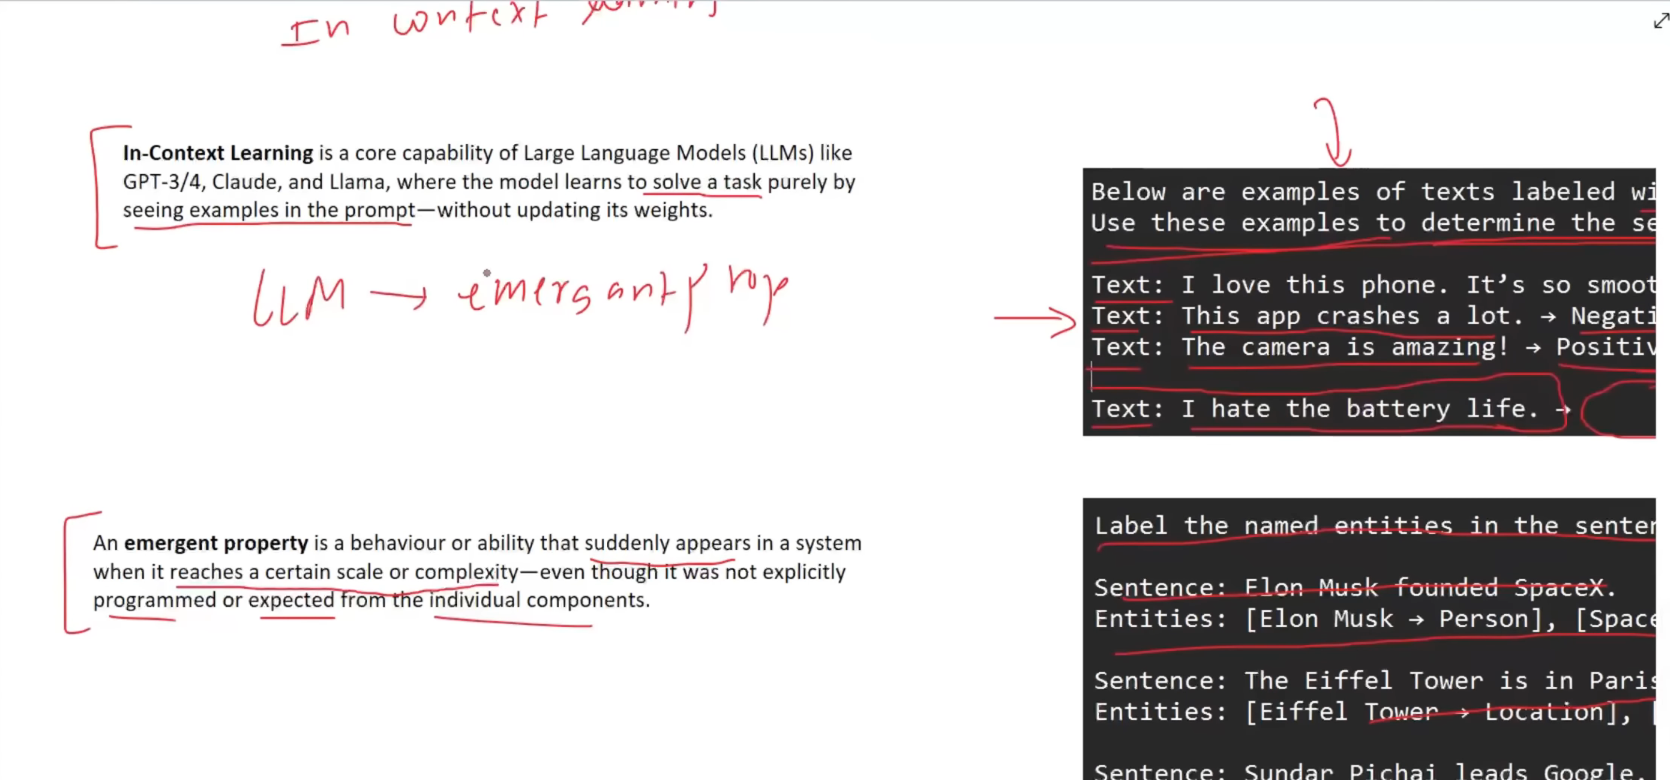



***

### What is Retrieval-Augmented Generation (RAG)?

RAG is considered one of the most common and useful applications in the current wave of Generative AI. Conceptually, RAG is a technique that makes a Large Language Model (LLM) smarter by providing it with **extra information (context)** at the moment a user asks a question.

RAG is essentially the combination (or "marriage") of two core concepts: **Information Retrieval** (a traditional computer science domain) and **Text Generation** (made famous by LLMs). The LLM uses this injected context, along with its own internal parametric knowledge, to solve the user's query and generate a response.

### The Need for RAG: Limitations of Standard LLMs

LLMs store their vast knowledge parametrically, within their weights and biases, acquired during pre-training on massive datasets. While prompting often works well, it fails in specific scenarios:

1.  **Private Data:** LLMs cannot answer questions about private, domain-specific data because they did not access this data during their pre-training phase.
2.  **Recent Data (Knowledge Cutoff):** Every LLM has a knowledge cutoff date. They cannot answer questions about current affairs or recent information if that data appeared after their last pre-training update.
3.  **Hallucination:** LLMs sometimes produce factually incorrect information with high confidence due to their probabilistic nature, a behavior known as hallucination.

### RAG vs. Alternative Solutions

Before RAG, there were other methods used to tackle these limitations:

#### 1. Fine-Tuning (FT)

Fine-Tuning involves taking a pre-trained LLM and training it again on a smaller, domain-specific dataset.

| Aspect | Fine-Tuning | RAG |
| :--- | :--- | :--- |
| **Knowledge Integration** | Integrates domain knowledge into the model's **parametric knowledge** (weights). | Injects domain knowledge as **external context** into the prompt. |
| **Cost & Complexity** | Computationally expensive and requires strong technical expertise (AI engineers/data scientists). | Generally a **cheaper and simpler alternative**. Training the model is not required. |
| **Updating Information** | Requires frequent and costly re-training/fine-tuning whenever new information is added or old information is removed. | New information is simply converted to embeddings and indexed in the vector store; no retraining is necessary. |

#### 2. In-Context Learning (ICL)

In-Context Learning is an **emergent property** of LLMs at a certain scale (e.g., GPT-3 and larger models). ICL allows the model to learn how to solve a task purely by seeing examples (few-shot prompting) within the prompt, without updating the model's weights.

**RAG is an enhancement of ICL**. Instead of sending general examples (few-shot prompting), RAG sends the **entire context** required to answer a specific query.

### The Four-Step RAG Pipeline

A RAG-based system is broadly divided into four sequential steps:

#### 1. Indexing (Knowledge Base Creation)
This preparation process creates the **External Knowledge Base** (the source from which context is derived).

*   **Document Ingestion:** Loading the source knowledge (e.g., video transcripts, company documents) into memory.
*   **Text Chunking:** Breaking the large document into smaller, semantically meaningful chunks. This is necessary because LLMs have limitations on the length of context they can process (context length limit), and smaller chunks improve the quality of semantic search.
*   **Generating Embeddings:** Converting each text chunk into a **dense vector** (embedding) that captures its semantic meaning. This is essential because future searching relies on semantic similarity between vectors.
*   **Storing in Vector Store:** Saving these vectors, along with the original text chunk and associated metadata, in a vector database (e.g., Faiss, Chroma, Pinecone).

#### 2. Retrieval
This is the **real-time process** of finding the most relevant pieces of information from the Vector Store index based on the user's question.

*   The user's query is converted into a vector (embedding) using the same embedding model used during indexing.
*   **Semantic Search** is performed to find the vectors in the vector store that are closest to the query vector.
*   The results are ranked (e.g., using cosine similarity).
*   The **top-ranked text chunks** are fetched; these become the context for the next step.

#### 3. Augmentation
This step involves creating the **final augmented prompt** by combining the user's query and the retrieved context.

*   The prompt typically includes strict instructions, such as asking the LLM to **"answer the question only from the provided context"** and to **"say you don't know"** if the context is insufficient. This explicit instruction helps reduce hallucinations.

#### 4. Generation
The augmented prompt is sent to the LLM. The LLM utilizes its text generation capability and the provided context to solve the query and produce a final response.

### How RAG Solves LLM Limitations

RAG effectively solves the three major problems associated with standard LLMs:

*   **Private Data:** Solved because the external knowledge base (the vector store) is built using the user’s private data, ensuring answers are grounded in that specific information.
*   **Recent Data:** Solved efficiently because new information only needs to be indexed (chunked, embedded, and stored) in the vector store, without the need for repetitive, costly model retraining (which was required for fine-tuning).
*   **Hallucination:** Solved by providing explicit context and instructing the LLM to strictly **ground its response** in that context, or else refuse to answer. This step significantly reduces the chances of the model fabricating information.

RAG is therefore considered a better, cheaper, and simpler solution compared to fine-tuning for solving these domain-specific and timeliness issues.

***
*Analogy:* You can think of a standard LLM as a brilliant student who has finished engineering school (pre-training) and holds all the general world knowledge in their brain (parametric knowledge). **RAG** is like giving that student instant access to a specific, up-to-the-minute textbook (the context from the vector store) right when you ask a question, ensuring they can answer specific queries accurately without having to rewrite or retrain their entire brain every time new information is published.